## Proyecto NLP: Análisis de sentimientos

### 2. Etapa de Preprocesado

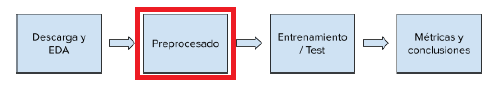

#### Instalar librerias necesarias

In [1]:
!pip install -r requirements.txt


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.3/143.3 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 2.6 MB/s eta 0:00:00
  Created wheel for pyDAWG: filename=pyDAWG-1.0.1-cp310-cp310-linux_x86_64.whl size=62201 sha256=f485d5a054dddabc2a5e8ee1dce10fe3544289d7104d09a5e9d35f52654c8288
  Stored in directory: /root/.cache/pip/wheels/15/5a/ec/7dfb31587fa2fee403d96efdb4ba07a1f85fb1aedf74c97da5
  Created wheel for stop_words: filename=stop_words-2018.7.23-py3-none-any.whl size=32895 sha256=23934e361f03e56be7f164db4a0a9cd96c168f2c9d15b7d9f574fbc016d9170d
  Stored in directory: /root/.cache/pip/wheels/d0/1a/23/f12552a50cb09bcc1694a5ebb6c2cd5f2a0311de2b8c3d9a89
  Created wheel for doc

#### Descarga de datos

In [2]:
import pandas as pd
df = pd.read_csv('./balanced_df.csv')

In [3]:
corpus = df['reviewText'].str.cat(sep='')
corpus

Output hidden; open in https://colab.research.google.com to view.

### 2.1 Preprocesado de texto paso a paso

Vamos a realizar los siguientes pasos para estandarizar el formato de los reviews:

- Tokenización en frases y palabras
- Convertir a minusculas
- Convertir numeros a texto
- Eliminar signos de puntuación y caracteres extraños
- Stopwords
- Lemmantización

#### 2.1.1 Tokenización en frases y palabras

In [4]:
# Tokenizar para separar en frases el corpus

sentences = corpus.split('.')
print(sentences[:5])

['Made in china', '', '', ' either a single bad luck of the draw or not the old Red Octane quality', "  :(  Assume i'm either stuck paying shipping on this large item somewhere to try and claim some warranty for it"]


In [5]:
# Tokens
sentence = sentences[10]
sentence

"Macro buttons in the way (obviously?), can't lift the mouse with out pushing them, WAY too light for a serious gaming mouse, Giving this away and getting another G700S (personal preference not a shameless plug"

In [7]:
# Enumerar las palabras dentro de una frase o token

for idx, word in enumerate(sentence.split(' ')):
     print('Word {0:5}{1:5}'.format(str(idx), word))

Word 0    Macro
Word 1    buttons
Word 2    in   
Word 3    the  
Word 4    way  
Word 5    (obviously?),
Word 6    can't
Word 7    lift 
Word 8    the  
Word 9    mouse
Word 10   with 
Word 11   out  
Word 12   pushing
Word 13   them,
Word 14   WAY  
Word 15   too  
Word 16   light
Word 17   for  
Word 18   a    
Word 19   serious
Word 20   gaming
Word 21   mouse,
Word 22   Giving
Word 23   this 
Word 24   away 
Word 25   and  
Word 26   getting
Word 27   another
Word 28   G700S
Word 29   (personal
Word 30   preference
Word 31   not  
Word 32   a    
Word 33   shameless
Word 34   plug 


#### 2.1.2 Normalización del texto

In [8]:
# Convertir a minúsculas para trabajar con un texto normalizado, también eliminar espacios al comienzo y al final
sentence = sentence.lower().strip()
sentence

"macro buttons in the way (obviously?), can't lift the mouse with out pushing them, way too light for a serious gaming mouse, giving this away and getting another g700s (personal preference not a shameless plug"

#### 2.1.3 Eliminar signos de puntuación

In [9]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [10]:
table = str.maketrans('', '', string.punctuation)
' '.join([word.translate(table) for word in sentence.split()])

'macro buttons in the way obviously cant lift the mouse with out pushing them way too light for a serious gaming mouse giving this away and getting another g700s personal preference not a shameless plug'

#### 2.1.4 Convertir números a texto

In [11]:
from num2words import num2words

In [12]:
sentence = sentences[5]
' '.join([word if not word.isdigit() else num2words(word, lang='en', ordinal=False) for word in sentence.split(' ')])

'  Might be better to buy it in person somewhere that will stand behind an in person warranty exchange after thirty days if there are still places that do'

#### 2.1.5 Palabras más comunes o frecuentes

In [13]:
from collections import Counter

word_freqs = Counter(corpus.lower().split())
word_freqs.most_common(10)

[('the', 83534),
 ('to', 41605),
 ('and', 40993),
 ('a', 37620),
 ('of', 28993),
 ('i', 28158),
 ('is', 25876),
 ('you', 24403),
 ('it', 21846),
 ('this', 18215)]

#### 2.1.6: Definimos Stopwords


Utilizar como lista base 'get_stop_words(en)' que ya continen varias de las letras, articulos, palabras y bigrams encontradas como mas frecuentes:
words
- ('the', 83534),
- ('to', 41605),
- ('and', 40993),
- ('a', 37620),
- ('of', 28993)
bigrams
- ('of', 'the'), (7639),
- ('in', 'the'), (4665),
- ('on', 'the'), (3234)



 y eliminamos algunas palabras similares de acuerdo a los clusters encontrados:
- ('gameplay', 'games') ---> 'game'
- ('playing', 'enjoy') ---> 'play'
- ('purchase', 'rent') ---> 'buy'

In [16]:
# Usar 'get_stop_words' de Python como lista base
from stop_words import get_stop_words
base_list=get_stop_words('en')
print(base_list)


['a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and', 'any', 'are', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', "can't", 'cannot', 'could', "couldn't", 'did', "didn't", 'do', 'does', "doesn't", 'doing', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', "hadn't", 'has', "hasn't", 'have', "haven't", 'having', 'he', "he'd", "he'll", "he's", 'her', 'here', "here's", 'hers', 'herself', 'him', 'himself', 'his', 'how', "how's", 'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', "isn't", 'it', "it's", 'its', 'itself', "let's", 'me', 'more', 'most', "mustn't", 'my', 'myself', 'no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'ought', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 'same', "shan't", 'she', "she'd", "she'll", "she's", 'should', "shouldn't", 'so', 'some', 'such', 'than', 'that', "that's", 'the', 'their', 'theirs', 'them', 'themselves', 't

In [17]:
 # Agregar palabras similares que queremos incluir en Stopwords
additional_words = ['games', 'gameplay', 'playing', 'enjoy', 'purchase', 'rent']
base_list.extend(additional_words)
base_list = list(set(base_list))
print(base_list)

['more', 'these', 'you', 'purchase', 'no', "we'd", 'what', "here's", "let's", 'other', 'at', "hasn't", "what's", 'being', 'was', 'be', "can't", "you'd", "we're", "i'll", "i'm", "we'll", 'would', 'hers', 'been', 'during', 'ought', 'whom', "i'd", 'me', "doesn't", 'of', 'an', 'to', 'themselves', "where's", 'did', 'up', "haven't", 'are', 'down', 'off', 'while', 'itself', 'on', 'her', 'games', 'yours', 'doing', 'any', 'my', "wasn't", 'their', 'were', 'having', 'we', "they'd", 'if', 'they', "she'll", "isn't", 'between', 'theirs', 'such', 'after', 'both', 'only', 'because', 'had', "when's", "she'd", 'under', "they've", 'each', "you'll", "won't", "it's", 'for', 'then', 'too', 'some', 'do', 'himself', 'myself', 'yourself', 'gameplay', 'so', "you've", "he'll", 'until', 'out', "didn't", 'same', "shan't", "why's", 'further', 'all', 'into', 'with', "that's", "you're", 'am', "shouldn't", 'ourselves', "i've", 'ours', "aren't", 'very', 'about', 'before', 'our', 'as', "hadn't", 'have', "he's", 'him', '

In [18]:
# Excluir las palabras 'no' y 'not' en nuestra lista Stopwords, porque podrian afectar el analisis de sentimiento si la review es negativa de origen.
sw_list = base_list
for word in ['no', 'not']:
    if word in sw_list:
        sw_list.remove(word)

print(sw_list)

['more', 'these', 'you', 'purchase', "we'd", 'what', "here's", "let's", 'other', 'at', "hasn't", "what's", 'being', 'was', 'be', "can't", "you'd", "we're", "i'll", "i'm", "we'll", 'would', 'hers', 'been', 'during', 'ought', 'whom', "i'd", 'me', "doesn't", 'of', 'an', 'to', 'themselves', "where's", 'did', 'up', "haven't", 'are', 'down', 'off', 'while', 'itself', 'on', 'her', 'games', 'yours', 'doing', 'any', 'my', "wasn't", 'their', 'were', 'having', 'we', "they'd", 'if', 'they', "she'll", "isn't", 'between', 'theirs', 'such', 'after', 'both', 'only', 'because', 'had', "when's", "she'd", 'under', "they've", 'each', "you'll", "won't", "it's", 'for', 'then', 'too', 'some', 'do', 'himself', 'myself', 'yourself', 'gameplay', 'so', "you've", "he'll", 'until', 'out', "didn't", 'same', "shan't", "why's", 'further', 'all', 'into', 'with', "that's", "you're", 'am', "shouldn't", 'ourselves', "i've", 'ours', "aren't", 'very', 'about', 'before', 'our', 'as', "hadn't", 'have', "he's", 'him', 'does',

Apliquemos todos los pasos anteriores de preprocesamiento mediante la definicion de un pipeline completo

### 2.2 Opción A: Pipeline con Python

In [19]:
# Creamos Pipeline con Python

def text_preprocessing(text, sw_list):

    # Inicializa variable
    processed_text = []

    # Convierte el texto a minúsuculas
    text = text.lower()

    # Tokeniza: Segmenta el texto en frases
    sentences = text.split('.')

    # Tabla para eliminar signos de puntuación
    table = str.maketrans('', '', string.punctuation)

    # Por cada frase, tokeniza las palabras, elimina signos de puntuación
    for sentence in sentences:
        words = sentence.split()
        # Para cada palabra se aplica Stopwords y se convierte números en texto
        for word in words:
          word = word.translate(table)
          if word and word not in sw_list:
                if word.isdigit():
                    word = num2words(word, lang='en')
                processed_text.append(word)

    return ' '.join(processed_text)


In [20]:
# Ejecutamos el pipeline usando la lista de Stopwords definida

text_preprocessing(corpus, sw_list)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Comparamos con Corpus original para evaluar resultado del pipeline
corpus

Output hidden; open in https://colab.research.google.com to view.

### 2.3 Opción  B: Pipeline con NLTK

In [21]:
import unicodedata
from num2words import num2words

import nltk
from nltk import word_tokenize, TreebankWordTokenizer, RegexpTokenizer, PunktSentenceTokenizer, WordPunctTokenizer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [22]:
# Creamos Pipeline utilizando la libreria NLTK

def nltk_cleaner(text, tokenizer, sw_list, lemmatizer):

    # Inicializa variable
    clean_text = list()

    # Separar palabras eliminando signos de puntuación
    for word in tokenizer.tokenize(text):

        # Eliminar stop words
        if word not in sw_list:

        # Eliminar espacios sobrantes, convertir a minúsculas y lematizar
            clean_word = lemmatizer.lemmatize(word).lower().strip()

        # Convertir dígitos a palabras
            if clean_word.isdigit():
                clean_word = num2words(clean_word, lang='en')

            clean_text.append(clean_word)

    return ' '.join(clean_text)

In [24]:
# Igual que antes, agregar palabras similares y excluir las palabras 'no' y 'not' de la lista de Stopwords de NLTK

new_list = stopwords.words('english')
additional_words = ['games', 'gameplay', 'playing', 'enjoy', 'purchase', 'rent']
new_list.extend(additional_words)
new_list = list(set(new_list))

for word in ['no', 'not']:
    if word in new_list:
        new_list.remove(word)

print(new_list)

['more', 'these', 'you', 'don', 'purchase', 'what', 'other', 'at', "hasn't", 'being', 'was', 'hadn', 'be', "you'd", 'ain', 'weren', 'now', 'didn', 'hers', 'been', 'during', 'whom', 'couldn', 'me', "doesn't", 'shan', 'of', 'haven', 'an', 'to', 'needn', 'themselves', 'did', 'up', "haven't", 'are', 'd', 'down', 'while', 'off', 'itself', 'on', 'her', 'games', 'yours', 'doing', 'my', 'any', "wasn't", 'their', 'were', 'aren', 'we', 'having', 'they', 'if', 'm', "isn't", 'between', 'theirs', 'such', 'after', 'both', 'only', 'because', "mightn't", 'had', 'under', 'each', "you'll", "won't", "it's", 'wasn', 'for', 'then', 'hasn', 'too', 'some', 'do', 'himself', 'myself', 'yourself', 'gameplay', 'so', "you've", 'until', 'out', "didn't", 'same', "shan't", "needn't", 'further', 'all', 'mustn', 'into', "you're", 'with', 'can', 'shouldn', 'am', "shouldn't", 'ourselves', 'ours', 'wouldn', "aren't", 'very', 'about', 'our', 'before', 'as', "hadn't", 'have', 'ma', 'him', 're', 'does', 'doesn', 'she', 'bel

In [25]:
# Pasamos los argumentos y corremos la función

sentence = sentences[3] # Define la frase o texto de prueba
tokenizer = RegexpTokenizer(r'\w+') # Escoge Regex como tipo de tokenizador usando como patron secuencias de caracteres de letras, dígitos y guiones bajos
sw_list = new_list
lemmatizer = WordNetLemmatizer()


pipeline = nltk_cleaner(sentence, tokenizer, sw_list, lemmatizer)


In [26]:
# Resultado de preprocesamiento de una frase ejecutando el Pipeline

print('Frase original:', sentence)
print('Frase pipeline:', pipeline)

Frase original:  either a single bad luck of the draw or not the old Red Octane quality
Frase pipeline: either single bad luck draw not old red octane quality


In [27]:
# Otro ejemplo
sentence = sentences[99]
print(sentence)
nltk_cleaner(sentence, tokenizer, sw_list, lemmatizer)

  People who make games like this, take a look at half life, portal, half life 2 etc


'people make like take look half life portal half life two etc'

In [28]:
# Ejecutando el pipeline en todo el corpus

new_corpus = nltk_cleaner(corpus, tokenizer, sw_list, lemmatizer)
new_corpus


Output hidden; open in https://colab.research.google.com to view.

In [29]:
# Comparación  con el corpus original
corpus

Output hidden; open in https://colab.research.google.com to view.

### Ejecución del Pipeline NLTK (B) en todos los reviews del dataset

In [30]:
df['reviewText'] = df['reviewText'].map(lambda x: nltk_cleaner(x, tokenizer, sw_list, lemmatizer))

In [31]:
null_count_before= df['reviewText'].isna().sum()
print(f"Null values in 'reviewText': {null_count_before}")

Null values in 'reviewText': 0


In [32]:
# Salvamos el nuevo dataset con los resultados del preprocesamiento con NLTK para la siguiente etapa
df.to_csv('./preprocess_df.csv', index=False)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   overall          10000 non-null  int64 
 1   reviewText       10000 non-null  object
 2   sentiment_label  10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 234.5+ KB
